In [1]:
# Install the readr package
install.packages("readr")

# Load the readr library
library(readr)

# Read the CSV file using readr
data <- read_csv("cleaned_dataset.csv")

# Display the first few rows of the dataset
print(head(data))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Rows: 2126 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (7): age, sex, bmi, children, smoker, region, expenses

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 6 × 7
    age   sex   bmi children smoker region expenses
  <dbl> <dbl> <dbl>    <dbl>  <dbl>  <dbl>    <dbl>
1    21     0  21.9        2      0      2    3181.
2    28     1  36.4        1      1      3   51195.
3    19     0  27.9        0      1      3   16885.
4    58     0  28.2        0      0      1   12224.
5    22     1  35.6        0      1      3   35586.
6    19     1  34.4        0      0      3    1262.


# Random Forest


# Data Modelling

In [2]:
# Install and load necessary packages
install.packages("caret")
library(caret)

# Read the CSV file
data <- read.csv("cleaned_dataset.csv", stringsAsFactors = FALSE)

# Define the feature variables (X) and the target variable (y)
X <- subset(data, select = -c(expenses))
y <- data$expenses

# Split the data into training and testing sets
set.seed(42)  # Ensure reproducibility
trainIndex <- createDataPartition(y, p = 0.8, list = FALSE)
X_train <- X[trainIndex, ]
X_test <- X[-trainIndex, ]
y_train <- y[trainIndex]
y_test <- y[-trainIndex]

# Print the size of training and testing sets
cat('Training set size:', nrow(X_train), '\n')
cat('Testing set size:', nrow(X_test), '\n')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice



Training set size: 1703 
Testing set size: 423 


In [7]:
install.packages("randomForest")
install.packages("Metrics")

# Load necessary libraries
library(randomForest)
library(Metrics)

# Assuming X_train, y_train, X_test, and y_test are already defined

# Initialize the Random Forest regression model
set.seed(42)
rf_model <- randomForest(X_train, y_train)

# Make predictions on the test data
y_pred_rf <- predict(rf_model, X_test)

# Calculate the Mean Squared Error
mse_rf <- mse(y_test, y_pred_rf)

# Calculate the Root Mean Squared Error
rmse_rf <- rmse(y_test, y_pred_rf)

# Calculate the Mean Absolute Error
mae_rf <- mae(y_test, y_pred_rf)

# Calculate the R-squared value
r2_rf <- 1 - (sum((y_test - y_pred_rf)^2) / sum((y_test - mean(y_test))^2))

# Print the results
cat(sprintf('Mean Squared Error (Random Forest): %f\n', mse_rf))
cat(sprintf('Mean Absolute Error (Random Forest): %f\n', mae_rf))
cat(sprintf('R-squared (Random Forest): %f\n', r2_rf))
cat(sprintf('Root Mean Squared Error (Random Forest) : %f\n', rmse_rf))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Mean Squared Error (Random Forest): 9909749.850352
Mean Absolute Error (Random Forest): 1746.797026
R-squared (Random Forest): 0.956108
Root Mean Squared Error (Random Forest) : 3147.975516


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



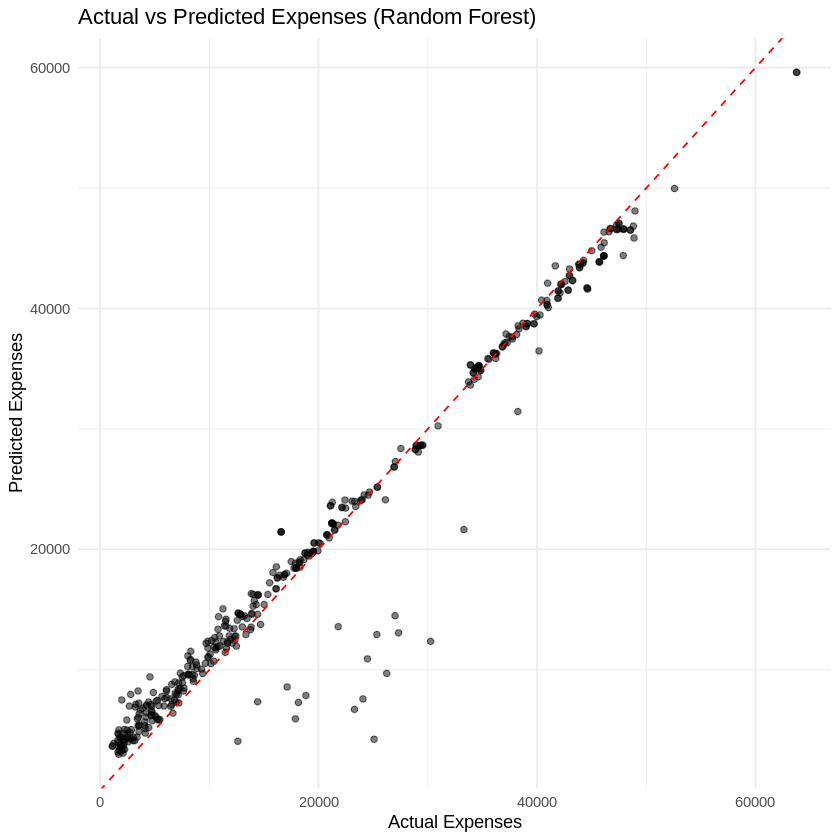

In [4]:
install.packages("ggplot2")

# Load necessary library
library(ggplot2)

# Assuming y_test and y_pred_rf are already defined

# Create a data frame with actual and predicted values
data <- data.frame(Actual = y_test, Predicted = y_pred_rf)

# Plot
ggplot(data, aes(x = Actual, y = Predicted)) +
  geom_point(alpha = 0.5) +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  labs(x = "Actual Expenses", y = "Predicted Expenses",
       title = "Actual vs Predicted Expenses (Random Forest)") +
  theme_minimal()


In [5]:
# Get feature importances from the trained Random Forest model
feature_importances <- importance(rf_model, type=2) # type=2 for MeanDecreaseGini

# Convert feature importances to a data frame
importance_rf <- data.frame(Feature = rownames(feature_importances),
                            Importance = feature_importances[, 1])

# Remove any rows with NA values
importance_rf <- na.omit(importance_rf)

# Select the top 5 features
top_features_rf <- importance_rf[order(-importance_rf$Importance), ][1:5, ]

# Print the top 5 features
print("Top 5 features for Random Forest regression:")
print(top_features_rf)

[1] "Top 5 features for Random Forest regression:"
          Feature   Importance
smoker     smoker 239879471830
bmi           bmi  80649328952
age           age  36926321430
children children   7003382690
region     region   6482016481


In [6]:
# Load necessary libraries
library(caret)
library(randomForest)

# Combine X_train and y_train into a single data frame
train_data <- cbind(X_train, y_train)

# Define the training control object
trctrl <- trainControl(method = "cv", number = 10)

# Determine the maximum allowable mtry based on the number of features
max_mtry <- min(15, ncol(X_train))

# Define the hyperparameter grid
grid <- expand.grid(mtry = seq(1, max_mtry, by = 5))

# Train the Random Forest model using caret
set.seed(42)
rf_model_caret <- train(train_data[, -ncol(train_data)],   # Features
                        train_data[, ncol(train_data)],    # Target variable
                        method = "rf",
                        trControl = trctrl,
                        tuneGrid = grid,
                        ntree = 500)

# Get feature importances from the trained Random Forest model
feature_importances <- varImp(rf_model_caret)$importance

# Convert feature importances to a data frame
importance_rf <- data.frame(Feature = rownames(feature_importances),
                            Importance = feature_importances[, 1])

# Remove any rows with NA values
importance_rf <- na.omit(importance_rf)

# Select the top 5 features
top_features_rf <- importance_rf[order(-importance_rf$Importance), ][1:5, ]

# Print the top 5 features
print("Top 5 features for Random Forest regression:")
print(top_features_rf)


[1] "Top 5 features for Random Forest regression:"
   Feature  Importance
5   smoker 100.0000000
3      bmi  43.8622376
1      age  13.4145846
4 children   0.8965593
6   region   0.7116297
